In [1]:
import sys
from importlib import reload 
sys.path.append('../hdssm_story/lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [7]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=False):
    return [
        ProductDistances([
            (10, Distances("euclidian_corrected" if for_ranking else "euclidian",
                           scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0_corrected" if for_ranking else "triple_trainable_l0",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected" if for_ranking else "triple_trainable_l1_sq",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected" if for_ranking else "triple_trainable_l1",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_hs_corrected" if for_ranking else "triple_trainable_l1_hs",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_ex_corrected" if for_ranking else "triple_trainable_l1_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_ex_corrected" if for_ranking else "triple_trainable_l1_sq_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("hyperspherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_3():
    return [
        ProductDistances([
            (11, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (6, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_exp_dot(k=1):
    return [
        ProductDistances([
            (10, Distances("exp_minus_dot", scalable=True))
        ], "sum")
        for _ in range(k)
    ]


def make_distances_4():
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
    ]

_____________


In [8]:
!ls ../datasets

3d_sphere_triang_120.edges   clique_4.edges		  graph.clusters
3d_sphere_triang_1920.edges  clique_5.edges		  karate.edges
3d_sphere_triang_30.edges    conflict.edges		  polblogs.edges
3d_sphere_triang_480.edges   cora			  polbooks.edges
airport.edges		     CSPhDs.edges		  power.edges
bg_20_700_0.05.edges	     cycle_100.edges		  reactome.edges
bipartite_100.edges	     cycle_5.edges		  smalltree.edges
bipartite_5.edges	     dolphins.edges		  star_100.edges
ca-cit-HepTh.edges	     eu-core.edges		  star_5.edges
Ca-HelpTh.edges		     eu-core-no-self-loops.edges  tree_3_6.edges
chicago.edges		     euroroad.edges		  usca312.edges
citeseer		     EuroSiS.edges		  wla6.edges
clique_100.edges	     facebook.edges		  wla6.nodes
clique_12.edges		     football.edges


In [9]:
G, distances_matrix, r_matrix  = utils.get_dataset("wla6.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/wla6.edges
|V| = 3227, |E| = 3604


_____________________
# Training

In [10]:
distortion_loss_storyz = list()

In [11]:
def print_best_distortion():
    for i, d in enumerate(make_distances(False)+make_distances_exp_dot()):
        ar = np.array([
            distortion_loss_story_nth[i][-1]
            for distortion_loss_story_nth in distortion_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [12]:
def do_distortion_for_lr(lr=0.05):
    distortion_loss_storyz.append(
        utils.estimate_signatures_distortion(
            make_model_2, qs, distances_matrix, r_matrix,
            make_distances(False)+make_distances_exp_dot(), 2000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            different_d_sum=True, print_results=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_distortion()

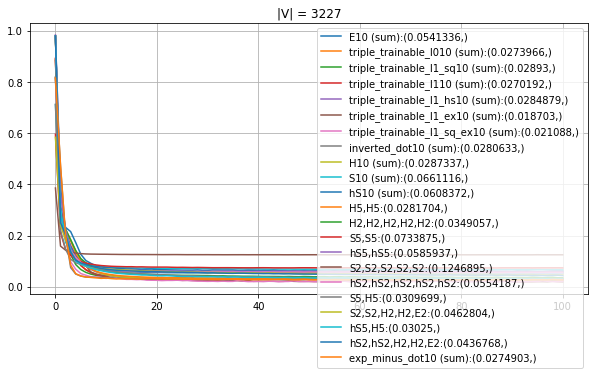


0.0541336	E10 (sum)
0.0273966	triple_trainable_l010 (sum)
0.02893	triple_trainable_l1_sq10 (sum)
0.0270192	triple_trainable_l110 (sum)
0.0284879	triple_trainable_l1_hs10 (sum)
0.018703	triple_trainable_l1_ex10 (sum)
0.021088	triple_trainable_l1_sq_ex10 (sum)
0.0280633	inverted_dot10 (sum)
0.0287337	H10 (sum)
0.0661116	S10 (sum)
0.0608372	hS10 (sum)
0.0281704	H5,H5
0.0349057	H2,H2,H2,H2,H2
0.0733875	S5,S5
0.0585937	hS5,hS5
0.1246895	S2,S2,S2,S2,S2
0.0554187	hS2,hS2,hS2,hS2,hS2
0.0309699	S5,H5
0.0462804	S2,S2,H2,H2,E2
0.03025	hS5,H5
0.0436768	hS2,hS2,H2,H2,E2
0.0274903	exp_minus_dot10 (sum)


=== Current global best:

(0.0541336,)	E10 (sum)
(0.0273966,)	triple_trainable_l010 (sum)
(0.02893,)	triple_trainable_l1_sq10 (sum)
(0.0270192,)	triple_trainable_l110 (sum)
(0.0284879,)	triple_trainable_l1_hs10 (sum)
(0.018703,)	triple_trainable_l1_ex10 (sum)
(0.021088,)	triple_trainable_l1_sq_ex10 (sum)
(0.0280633,)	inverted_dot10 (sum)
(0.0287337,)	H10 (sum)
(0.0661116,)	S10 (sum)
(0.0608372,)	hS

In [13]:
do_distortion_for_lr(0.1)

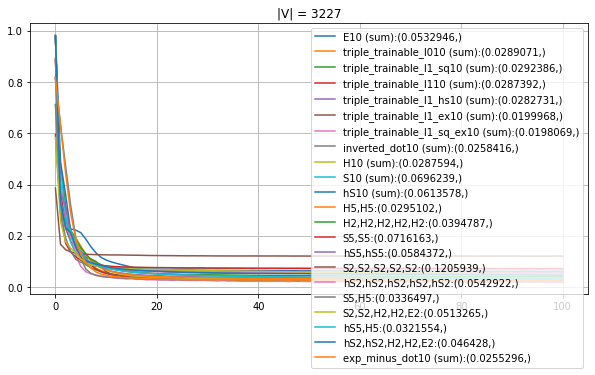


0.0532946	E10 (sum)
0.0289071	triple_trainable_l010 (sum)
0.0292386	triple_trainable_l1_sq10 (sum)
0.0287392	triple_trainable_l110 (sum)
0.0282731	triple_trainable_l1_hs10 (sum)
0.0199968	triple_trainable_l1_ex10 (sum)
0.0198069	triple_trainable_l1_sq_ex10 (sum)
0.0258416	inverted_dot10 (sum)
0.0287594	H10 (sum)
0.0696239	S10 (sum)
0.0613578	hS10 (sum)
0.0295102	H5,H5
0.0394787	H2,H2,H2,H2,H2
0.0716163	S5,S5
0.0584372	hS5,hS5
0.1205939	S2,S2,S2,S2,S2
0.0542922	hS2,hS2,hS2,hS2,hS2
0.0336497	S5,H5
0.0513265	S2,S2,H2,H2,E2
0.0321554	hS5,H5
0.046428	hS2,hS2,H2,H2,E2
0.0255296	exp_minus_dot10 (sum)


=== Current global best:

(0.0532946,)	E10 (sum)
(0.0273966,)	triple_trainable_l010 (sum)
(0.02893,)	triple_trainable_l1_sq10 (sum)
(0.0270192,)	triple_trainable_l110 (sum)
(0.0282731,)	triple_trainable_l1_hs10 (sum)
(0.018703,)	triple_trainable_l1_ex10 (sum)
(0.0198069,)	triple_trainable_l1_sq_ex10 (sum)
(0.0258416,)	inverted_dot10 (sum)
(0.0287337,)	H10 (sum)
(0.0661116,)	S10 (sum)
(0.060837

In [14]:
do_distortion_for_lr(0.05)

In [16]:
softmax_loss_storyz = list()

In [17]:
def print_best_softmax():
    for i, d in enumerate(make_distances(True)+make_distances_exp_dot()):
        ar = np.array([
            softmax_loss_story_nth[i][-1]
            for softmax_loss_story_nth in softmax_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [18]:
def do_softmax_for_lr(lr=0.05):
    softmax_loss_storyz.append(
        utils.estimate_signatures_softmax(
            make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
            dists=make_distances(True)+make_distances_exp_dot(), iters=2000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            print_results=True, different_d_sum=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_softmax()

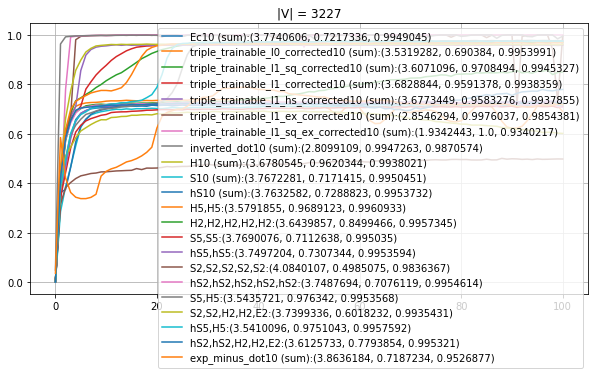

0.7217336	Ec10 (sum)
0.690384	triple_trainable_l0_corrected10 (sum)
0.9708494	triple_trainable_l1_sq_corrected10 (sum)
0.9591378	triple_trainable_l1_corrected10 (sum)
0.9583276	triple_trainable_l1_hs_corrected10 (sum)
0.9976037	triple_trainable_l1_ex_corrected10 (sum)
1.0	triple_trainable_l1_sq_ex_corrected10 (sum)
0.9947263	inverted_dot10 (sum)
0.9620344	H10 (sum)
0.7171415	S10 (sum)
0.7288823	hS10 (sum)
0.9689123	H5,H5
0.8499466	H2,H2,H2,H2,H2
0.7112638	S5,S5
0.7307344	hS5,hS5
0.4985075	S2,S2,S2,S2,S2
0.7076119	hS2,hS2,hS2,hS2,hS2
0.976342	S5,H5
0.6018232	S2,S2,H2,H2,E2
0.9751043	hS5,H5
0.7793854	hS2,hS2,H2,H2,E2
0.7187234	exp_minus_dot10 (sum)


=== Current global best:

(3.7740606, 0.7217336, 0.9949045)	Ec10 (sum)
(3.5319282, 0.690384, 0.9953991)	triple_trainable_l0_corrected10 (sum)
(3.6071096, 0.9708494, 0.9945327)	triple_trainable_l1_sq_corrected10 (sum)
(3.6828844, 0.9591378, 0.9938359)	triple_trainable_l1_corrected10 (sum)
(3.6773449, 0.9583276, 0.9937855)	triple_trainable_l1_

In [19]:
do_softmax_for_lr(0.1)

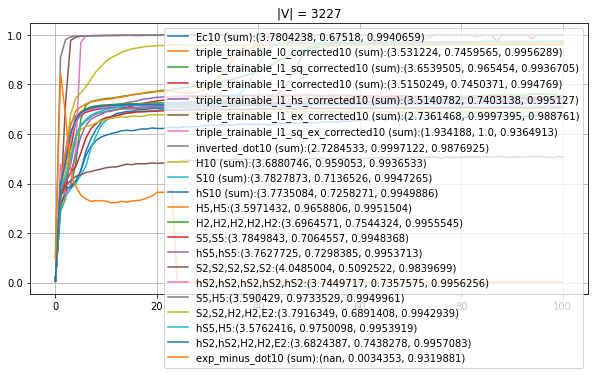

0.67518	Ec10 (sum)
0.7459565	triple_trainable_l0_corrected10 (sum)
0.965454	triple_trainable_l1_sq_corrected10 (sum)
0.7450371	triple_trainable_l1_corrected10 (sum)
0.7403138	triple_trainable_l1_hs_corrected10 (sum)
0.9997395	triple_trainable_l1_ex_corrected10 (sum)
1.0	triple_trainable_l1_sq_ex_corrected10 (sum)
0.9997122	inverted_dot10 (sum)
0.959053	H10 (sum)
0.7136526	S10 (sum)
0.7258271	hS10 (sum)
0.9658806	H5,H5
0.7544324	H2,H2,H2,H2,H2
0.7064557	S5,S5
0.7298385	hS5,hS5
0.5092522	S2,S2,S2,S2,S2
0.7357575	hS2,hS2,hS2,hS2,hS2
0.9733529	S5,H5
0.6891408	S2,S2,H2,H2,E2
0.9750098	hS5,H5
0.7438278	hS2,hS2,H2,H2,E2
0.0034353	exp_minus_dot10 (sum)


=== Current global best:

(3.7740606, 0.7217336, 0.9949045)	Ec10 (sum)
(3.531224, 0.7459565, 0.9956289)	triple_trainable_l0_corrected10 (sum)
(3.6071096, 0.9708494, 0.9945327)	triple_trainable_l1_sq_corrected10 (sum)
(3.5150249, 0.9591378, 0.994769)	triple_trainable_l1_corrected10 (sum)
(3.5140782, 0.9583276, 0.995127)	triple_trainable_l1_hs_c

In [20]:
do_softmax_for_lr(0.05)